In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from scipy import stats

### Central Limit Theorem
If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30) from the population, then the distribution of the sample means will be approximately normally distributed

In [2]:
roll  = stats.randint(1, 7)

Text(0.5, 1.0, 'Uniform Population distribution')

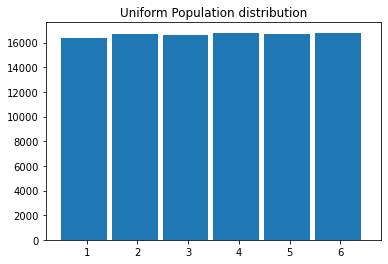

In [3]:
plt.hist(roll.rvs(100000), bins= [1,2,3,4,5,6,7], align = 'left', width = 0.9)
plt.title('Uniform Population distribution')

In [4]:
roll.rvs(100000).mean()

3.50069

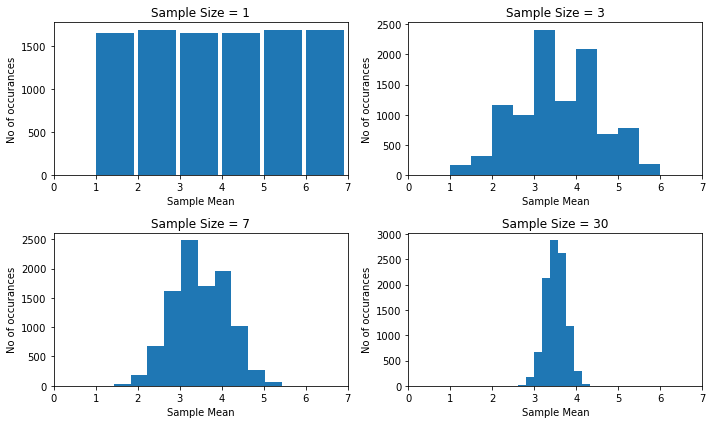

# Chi$^2$ ($\chi^2$) Test for Independence

aka Pearson's Chi$^2$ test. Pronounced as 'Ki' as in kite.


https://docs.google.com/presentation/d/13V7cMcgbM6bIQL2fbMtONre15iiNKpxnX7ECiWTxrVI/edit?usp=sharing


Lets us test the hypothesis that one group is independent of another
- $H_0$ is always that there is no association between the groups (they are independent)
- $H_a$ is that there is a association (they are not independent) between the groups


The null hypothesis assumes that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable

## The Quick Way To Run a Chi$^2$ Test

In [5]:
# get data from pydataset
df = data('tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Form hypothesis:

- $H_0$ There is no association between the smoker and time of the day (independence)
- $H_a$ is that there is a association between smoker and time of day

In [7]:
# pandas crosstab to make a 'contingency' table
observed = pd.crosstab(df.smoker, df.time)

In [8]:
# Set our alpha
alpha = 0.05

In [12]:
# chi2_contingency returns 4 different values

chi2, p, df, expected = stats.chi2_contingency(observed)

In [13]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[106  45]
 [ 70  23]]
---
Expected

[[108  42]
 [ 67  25]]
---

chi^2 = 0.5054
p     = 0.4771


In [14]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


## Attrition Data

In [28]:
# get your data
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

In [16]:
# check the head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
# check shape of the dataframe
df.shape

(1470, 35)

In [18]:
# Check for which columns are discrete/categorical?
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### Question we want to answer:

#### 1. Is Attrition independent from Business Travel amount?



In [19]:
# look at # of categories in Attrition column
df.Attrition.nunique()


2

In [20]:
# look at # of categories in business travel

df.BusinessTravel.nunique()

3

Form hypothesis:

$H_0$: Attrition and Business travel have no association (They are independent)

$H_a$: Attrition and Business travel are associated (they are dependent)

In [22]:
# Crosstab Attrition vs Business Travel
observed = pd.crosstab(df.Attrition, df.BusinessTravel)
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


In [ ]:
# Set our alpha

alpha = 0.05

In [23]:
# .chi2_contingency returns 4 different values

chi2, p, df, expected = stats.chi2_contingency(observed)

In [24]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[138 208 887]
 [ 12  69 156]]
---
Expected

[[125 232 874]
 [ 24  44 168]]
---

chi^2 = 24.1824
p     = 0.0000


In [25]:
null_hypothesis = "Attrition and Business Travel are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")



We reject the hypothesis that Attrition and Business Travel are independent


## Mini Exercise:
#### Is Attrition independent from Department?

Form the null and alternate hypothesis

- $H_0$: There is no association between dept and attrition (independence)
- $H_a$: There is an association between dept and attrition

In [30]:
# how many categories we have in 'Department' column? (hint: value_counts())
df.Department.nunique()

3

In [31]:
# crosstab for observed values between Attrition and Depts
observed = pd.crosstab(df.Attrition, df.Department)
observed

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [32]:
# use stats.chi2_contingency test 
chi2, p, df, expected = stats.chi2_contingency(observed)

Decide using p-value:

In [33]:
p < alpha

True

In [ ]:
Since p is less than alpha, 0.05, we reject the null hypothesis.